# Computing the predictions

It's time to see how your net performs on unseen `test` data. We will divide the tutorial in 3 parts depending on whether you want to:
* Predict filepaths contained in a [dataset split .txt file](#Predicting-a-datasplit-txt-file)
* Predict [local images](#Predicting-local-files)
* Predict [url images](#Predicting-image-urls)

**Note** Parameters in UPPERCASE letters must be changed by the user if needed.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import os
import json
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.models import load_model

from imgclas.data_utils import load_image, load_data_splits, load_class_names
from imgclas.test_utils import predict
from imgclas import paths, plot_utils, utils

# User parameters to set
TIMESTAMP = '2022-04-19_Fold2SpAnd45Balanced_17ep_stop_16Batch'        # timestamp of the model
MODEL_NAME = 'final_model.h5'                           # model to use to make the prediction
TOP_K = 2                                               # number of top classes predictions to save

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load the data
class_names = load_class_names(splits_dir=paths.get_ts_splits_dir())

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)
    
# Load the model
model = load_model(os.path.join(paths.get_checkpoints_dir(), MODEL_NAME), custom_objects=utils.get_custom_objects(), compile=False)

Loading class names...


## Predicting a datasplit txt file

Here we are going to compute the predictions and save them into a `.json` file to retireve them later. 

In [10]:
cd /srv/image-classification-tf

/srv/image-classification-tf


In [13]:
SPLIT_NAME = 'test2_Contrast1-5'      # data split to use (nombre del .txt que vas a leer, en este caso test)
# conf['general']['images_directory'] = '/media/ignacio/Datos/datasets/semillas/datasets/RJB'  # custom the absolute path to the images directory, if needed

# Load the data
X, y = load_data_splits(splits_dir=paths.get_ts_splits_dir(),
                        im_dir=conf['general']['images_directory'],
                        split_name=SPLIT_NAME)

# Predict
pred_lab, pred_prob = predict(model, X, conf, top_K=TOP_K, filemode='local')

# Save the predictions
pred_dict = {'filenames': list(X),
             'pred_lab': pred_lab.tolist(),
             'pred_prob': pred_prob.tolist()}
if y is not None:
    pred_dict['true_lab'] = y.tolist()

pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}+top{}.json'.format(MODEL_NAME, SPLIT_NAME, TOP_K))
with open(pred_path, 'w') as outfile:
    json.dump(pred_dict, outfile, sort_keys=True)

Loading test2_Contrast1-5 data...
47/47 [==============================] - 152s 3s/step


## Predicting local files

#### Predict a single local image

1/1 [==============================] - 4s 4s/step


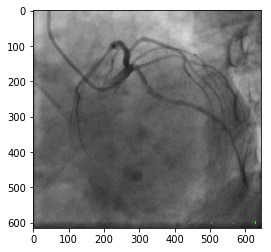

[99.1%] no sinuoso
[0.9%] sinuoso


In [9]:
# FILEPATH = r"C:\Users\Miriam\Desktop\9221_45.jpg" # no se pueden leer archivos desde local en la maquina virtual, hay que subirlos aqui
FILEPATH = '/srv/datos/ENVIO_DEFINITIVO/NO_TORTUOSOS_OFICIAL/8231/8231_SPIDER_n.png'

pred_lab, pred_prob = predict(model, FILEPATH, conf, top_K=TOP_K)#, filemode='local')

plt.imshow(load_image(FILEPATH))#, filemode='local'))
plt.show()
for j in range(pred_lab.shape[1]):
    print('[{:.1f}%] {}'.format(pred_prob[0, j] * 100, class_names[pred_lab[0, j]]))

In [10]:
pred_lab

array([[0, 1]])

In [11]:
pred_prob

array([[0.9910434 , 0.00895682]], dtype=float32)

3/3 [==============================] - 10s 3s/step


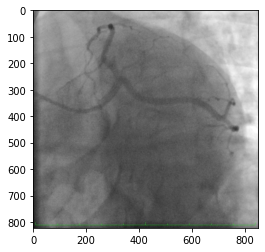

[93.3%] no sinuoso
[6.7%] sinuoso


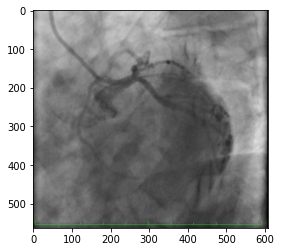

[87.8%] no sinuoso
[12.2%] sinuoso


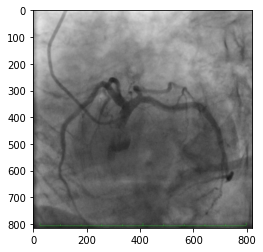

[76.6%] no sinuoso
[23.4%] sinuoso


In [12]:
FILEPATHS = ['/srv/datos/ENVIO_OFICIAL/NO_TORTUOSOS_OFICIAL/10298/10298_SPIDER_n.jpg',
             '/srv/datos/ENVIO_OFICIAL/NO_TORTUOSOS_OFICIAL/7994/7994_SPIDER_n.jpg',
             '/srv/datos/ENVIO_OFICIAL/NO_TORTUOSOS_OFICIAL/10529/10529_SPIDER_n.jpg']
     
pred_lab, pred_prob = predict(model, FILEPATHS, conf, top_K=TOP_K, filemode='local')

for i, im_path in enumerate(FILEPATHS):
    plt.figure(i)
    plt.imshow(load_image(im_path, filemode='local'))
    plt.show()
    for j in range(pred_lab.shape[1]):
        print('[{:.1f}%] {}'.format(pred_prob[i, j] * 100, class_names[pred_lab[i, j]]))